In [119]:
# Для конфиденциальности заменил название авиакомпании на "..."

In [120]:
import os

In [121]:
import pandas as pd

In [122]:
import matplotlib.pyplot as plt

In [123]:
import numpy as np

In [124]:
import seaborn as sns

In [125]:
from openpyxl import load_workbook

In [126]:
df_2011 = pd.read_excel('exc.xlsx', sheet_name='авиабилеты 2011')

In [127]:
df_2012 = pd.read_excel('exc.xlsx', sheet_name='авиабилеты 2012')

In [128]:
df_2011.head(2)

,Day of Дата продажи,"Month of Дата вылета, локальная",Подгруппа рейсов,Каналы продаж (новый),Состояние купона,"Выручка, руб.",Количество пассажиросегментов
0,2011-08-01,2010-08-01 00:00:00,OVB Far East,... Call Center,E,-37740.73,-2
1,2011-08-01,2010-09-01 00:00:00,OVB West,... Call Center,R,-1329.53,-1


In [129]:
df_2012.head(2)

,Day of Дата продажи,"Month of Дата вылета, локальная",Подгруппа рейсов,Каналы продаж (новый),Состояние купона,"Выручка, руб.",Количество пассажиросегментов
0,2012-08-01,2011-06-01 00:00:00,ASIA South East,OTA,E,-6182.87,-2
1,2012-08-01,2011-06-01 00:00:00,MOW Long,OTA,E,-6508.60,-2


In [130]:
df_2011.info()
# Изначально данные во втором столбце в формате object, а не datetime64. Это связано с тем, что в столбце присутствуют
# некорректные значения дат, где указан 5555 год. Для того, чтобы дальнейший анализ был корректным, приведу эти значения
# к NaT. Таким образом получится поменять формат с object на datetime64 при этом не потеряв данные, хранящиеся в других столбцах.

# Можно также не учитывать эти строки в дальнейшем анализе, но мне почему-то показалось, что это неправильно :)

# Примечание: по сути, в строках из этого списка, где состояние купона = O, оно никогда не перейдет в N, так как значение 
# даты вылета ошибочно, если конечно не предусмотрен код как раз для случаев с некорректным годом вылета.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142410 entries, 0 to 142409
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Day of Дата продажи              142410 non-null  datetime64[ns]
 1   Month of Дата вылета, локальная  142410 non-null  object        
 2   Подгруппа рейсов                 142122 non-null  object        
 3   Каналы продаж (новый)            142410 non-null  object        
 4   Состояние купона                 142410 non-null  object        
 5   Выручка, руб.                    142410 non-null  float64       
 6   Количество пассажиросегментов    142410 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 7.6+ MB


In [131]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65055 entries, 0 to 65054
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Day of Дата продажи              65055 non-null  datetime64[ns]
 1   Month of Дата вылета, локальная  65055 non-null  object        
 2   Подгруппа рейсов                 64933 non-null  object        
 3   Каналы продаж (новый)            65055 non-null  object        
 4   Состояние купона                 65055 non-null  object        
 5   Выручка, руб.                    65055 non-null  float64       
 6   Количество пассажиросегментов    65055 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.5+ MB


In [132]:
df_2011.iloc[:, 1] = pd.to_datetime(df_2011.iloc[:, 1], errors='coerce')

In [133]:
nat_rows_2011 = df_2011[df_2011.iloc[:, 1].isna()]
nat_rows_2011.head(2)

,Day of Дата продажи,"Month of Дата вылета, локальная",Подгруппа рейсов,Каналы продаж (новый),Состояние купона,"Выручка, руб.",Количество пассажиросегментов
816,2011-08-01,NaT,MOW Long,TA,R,26506.67,2
5725,2011-08-06,NaT,MOW Long,TA,E,-13253.33,-1


In [134]:
df_2012.iloc[:, 1] = pd.to_datetime(df_2012.iloc[:, 1], errors='coerce')

In [135]:
nat_rows_2012 = df_2012[df_2012.iloc[:, 1].isna()]
nat_rows_2012.head(2)

,Day of Дата продажи,"Month of Дата вылета, локальная",Подгруппа рейсов,Каналы продаж (новый),Состояние купона,"Выручка, руб.",Количество пассажиросегментов
866,2012-08-01,NaT,MOW Long,... Call Center,E,-57960.00,-3
1916,2012-08-02,NaT,MOW Long,... Call Center,O,107613.33,4


In [136]:
# Перехожу к анализу. 

In [137]:
# Рассчитаю доходную ставку

In [138]:
sales_by_month_2011 = df_2011.groupby(df_2011.iloc[:, 0].dt.month)['Выручка, руб.'].sum()
segments_by_month_2011 = df_2011.groupby(df_2011.iloc[:, 0].dt.month)['Количество пассажиросегментов'].sum()
income_rate_2011 = sales_by_month_2011 / segments_by_month_2011
income_rate_2011 = income_rate_2011.round(2).rename('Доходная ставка за 2011 год по месяцам') # Сократил до двух знаков
income_rate_2011

Day of Дата продажи
8    3346.68
9    3085.82
10   2968.37
11   2715.05
Name: Доходная ставка за 2011 год по месяцам, dtype: float64

In [139]:
sales_by_month_2012 = df_2012.groupby(df_2012.iloc[:, 0].dt.month)['Выручка, руб.'].sum()
segments_by_month_2012 = df_2012.groupby(df_2012.iloc[:, 0].dt.month)['Количество пассажиросегментов'].sum()
income_rate_2012 = sales_by_month_2012 / segments_by_month_2012
income_rate_2012 = income_rate_2012.round(2).rename('Доходная ставка за 2012 год по месяцам')
income_rate_2012

Day of Дата продажи
8   4162.17
9   3390.03
Name: Доходная ставка за 2012 год по месяцам, dtype: float64

In [140]:
months_2011 = ['Август', 'Сентябрь', 'Октябрь', 'Ноябрь']

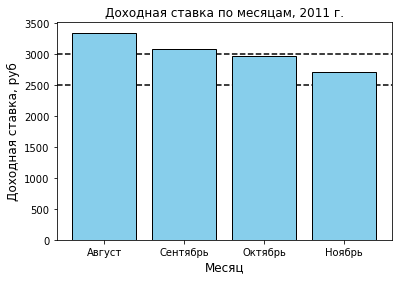

In [141]:
plt.bar(months_2011, income_rate_2011, color='skyblue', edgecolor='black')
plt.axhline(y=2500, color='black', linestyle='--', zorder=0)
plt.axhline(y=3000, color='black', linestyle='--', zorder=0)
plt.title('Доходная ставка по месяцам, 2011 г.')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Доходная ставка, руб', fontsize=12)
plt.show()

In [142]:
months_2012=['Август', 'Сентябрь']

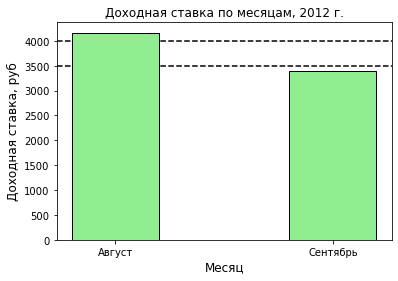

In [143]:
plt.bar(months_2012, income_rate_2012, color='lightgreen', edgecolor='black', width=0.4)
plt.axhline(y=3500, color='black', linestyle='--', zorder=0)
plt.axhline(y=4000, color='black', linestyle='--', zorder=0)
plt.title('Доходная ставка по месяцам, 2012 г.')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Доходная ставка, руб', fontsize=12)
plt.show()

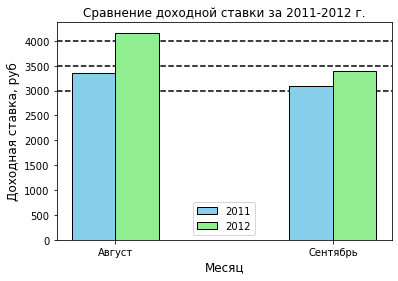

In [144]:
income_rate_2011_ch = income_rate_2011.drop([10, 11])
months_2011_ch = ['Август', 'Сентябрь']
plt.bar(months_2011_ch, income_rate_2011_ch, color='skyblue', edgecolor='black', width = -0.2, align ='edge', label='2011')
plt.axhline(y=3000, color='black', linestyle='--', zorder=0)
plt.axhline(y=3500, color='black', linestyle='--', zorder=0)
plt.axhline(y=4000, color='black', linestyle='--', zorder=0)
plt.title('Сравнение доходной ставки за 2011-2012 г.')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Доходная ставка, руб', fontsize=12)
plt.legend()
plt.bar(months_2012, income_rate_2012, color='lightgreen', edgecolor='black', width = 0.2, align ='edge', label='2012')
plt.legend()
plt.show()

In [145]:
# При необходимости могу построить более сложные графики, также имею опыт использования seaborn.

In [146]:
# Для более точного представления данных уберем экспоненту из результатов
pd.set_option('display.float_format', '{:.2f}'.format)

In [147]:
# Визуал по дальнейшим шагам сделан в Tableau

In [148]:
sales_by_month_2011

Day of Дата продажи
8    3932427591.87
9    4098153234.93
10   2875300757.47
11   3319902449.27
Name: Выручка, руб., dtype: float64

In [149]:
sales_by_month_2012

Day of Дата продажи
8   6738753244.53
9   5988043072.20
Name: Выручка, руб., dtype: float64

In [150]:
sales_by_month_2011.describe()

count            4.00
mean    3556446008.38
std      564127816.08
min     2875300757.47
25%     3208752026.32
50%     3626165020.57
75%     3973859002.63
max     4098153234.93
Name: Выручка, руб., dtype: float64

In [151]:
sales_by_month_2012.describe()

count            2.00
mean    6363398158.37
std      530832253.56
min     5988043072.20
25%     6175720615.28
50%     6363398158.37
75%     6551075701.45
max     6738753244.53
Name: Выручка, руб., dtype: float64

In [152]:
# Анализ продаж по подгруппе рейсов
subgroup_2011 = df_2011.groupby(df_2011.iloc[:, 2])['Выручка, руб.'].sum()
subgroup_2011

Подгруппа рейсов
ASIA Central          261285195.73
ASIA China            -16214555.00
ASIA South East      -152164838.93
CODE SHARE              6344108.87
EUROPE East          -129324968.73
EUROPE Middle East    598698865.33
EUROPE Western       -112469546.00
MOW Center           2120400324.93
MOW Long             3317299260.80
MOW South            2989791099.87
OVB Far East         1505249574.73
OVB Sib              1434159915.53
OVB West             2207013698.87
Name: Выручка, руб., dtype: float64

In [153]:
subgroup_2011.describe()

count           13.00
mean    1079236010.46
std     1257335487.06
min     -152164838.93
25%      -16214555.00
50%      598698865.33
75%     2120400324.93
max     3317299260.80
Name: Выручка, руб., dtype: float64

In [154]:
subgroup_2012 = df_2012.groupby(df_2012.iloc[:, 2])['Выручка, руб.'].sum()
subgroup_2012

Подгруппа рейсов
ASIA Central         1184179648.40
ASIA China              -481797.40
ASIA South East        79350571.07
CODE SHARE              2194732.87
EUROPE East           409033973.60
EUROPE Middle East    709990639.40
EUROPE Western        205314119.73
MOW Center           1597420650.47
MOW Long             2274802067.07
MOW South            1881966721.60
OVB Far East         1143435005.07
OVB Sib              1229985708.47
OVB West             1950556391.47
Name: Выручка, руб., dtype: float64

In [155]:
subgroup_2012.describe()

count           13.00
mean     974442187.06
std      799551880.34
min        -481797.40
25%      205314119.73
50%     1143435005.07
75%     1597420650.47
max     2274802067.07
Name: Выручка, руб., dtype: float64

In [156]:
# Анализ продаж в зависимости от канала
canal_2011 = df_2011.groupby(df_2011.iloc[:, 3])['Выручка, руб.'].sum()
canal_2011

Каналы продаж (новый)
... Call Center        -8967400.87
... MSE               798549040.33
... Representative    433048037.80
... Service           117120492.07
... TMC                15812162.80
... WWW              6382975586.87
OTA                  1908238112.20
TA                   3509621710.47
TA Web-Based         1069386291.87
Name: Выручка, руб., dtype: float64

In [157]:
canal_2011.describe()

count            9.00
mean    1580642670.39
std     2127150652.44
min       -8967400.87
25%      117120492.07
50%      798549040.33
75%     1908238112.20
max     6382975586.87
Name: Выручка, руб., dtype: float64

In [158]:
canal_2012 = df_2012.groupby(df_2012.iloc[:, 3])['Выручка, руб.'].sum()
canal_2012

Каналы продаж (новый)
... Call Center       123822463.80
... MSE               796481428.40
... Representative    388922216.20
... Service            53338782.00
... TMC                  500997.47
... WWW              5748593830.00
OTA                  1227477831.07
TA                   3298222815.53
TA Web-Based         1089435952.27
Name: Выручка, руб., dtype: float64

In [159]:
canal_2012.describe()

count            9.00
mean    1414088479.64
std     1917849761.59
min         500997.47
25%      123822463.80
50%      796481428.40
75%     1227477831.07
max     5748593830.00
Name: Выручка, руб., dtype: float64

In [160]:
grouped_2011 = df_2011.groupby([df_2011.iloc[:, 0].dt.month, df_2011.iloc[:, 3]])
canal_month_2011 = grouped_2011['Выручка, руб.'].sum()
canal_month_2011

Day of Дата продажи  Каналы продаж (новый)
8                    ... Call Center            4517010.87
                     ... MSE                  214206865.13
                     ... Representative       165575782.40
                     ... Service               35276845.80
                     ... TMC                    6345230.27
                     ... WWW                 1686983230.33
                     OTA                      606744456.73
                     TA                       930020660.80
                     TA Web-Based             282757509.53
9                    ... Call Center           -4271912.87
                     ... MSE                  200354948.27
                     ... Representative       107643895.33
                     ... Service               31920465.27
                     ... TMC                    4348753.73
                     ... WWW                 1929028906.47
                     OTA                      520201795.40
             

In [161]:
c_m_ri_2011 = canal_month_2011.reset_index()
c_m_ri_2011.head(2)

,Day of Дата продажи,Каналы продаж (новый),"Выручка, руб."
0,8,... Call Center,4517010.87
1,8,... MSE,214206865.13


In [162]:
grouped_2012 = df_2012.groupby([df_2012.iloc[:, 0].dt.month, df_2012.iloc[:, 3]])
canal_month_2012 = grouped_2012['Выручка, руб.'].sum()
canal_month_2012

Day of Дата продажи  Каналы продаж (новый)
8                    ... Call Center           63664405.93
                     ... MSE                  442074768.80
                     ... Representative       224090209.93
                     ... Service               31591176.87
                     ... TMC                     275443.93
                     ... WWW                 2988249744.20
                     OTA                      646709583.33
                     TA                      1786275234.33
                     TA Web-Based             555822677.20
9                    ... Call Center           60158057.87
                     ... MSE                  354406659.60
                     ... Representative       164832006.27
                     ... Service               21747605.13
                     ... TMC                     225553.53
                     ... WWW                 2760344085.80
                     OTA                      580768247.73
             

In [163]:
c_m_ri_2012 = canal_month_2012.reset_index()
c_m_ri_2012.head(2)

,Day of Дата продажи,Каналы продаж (новый),"Выручка, руб."
0,8,... Call Center,63664405.93
1,8,... MSE,442074768.80


In [164]:
# Перегоняем полученные данные в Эксель для дальнейшей работы в Tableau
sales_2011_xls = pd.DataFrame({'Месяц': sales_by_month_2011.index, 'Сумма продаж': sales_by_month_2011.values})
sales_2011_xls.to_excel('data_Tableau.xlsx', index=False)

In [165]:
sales_2012_xls = pd.DataFrame({'Месяц': sales_by_month_2012.index, 'Сумма продаж': sales_by_month_2012.values})
tableau_book=load_workbook('data_Tableau.xlsx')
with pd.ExcelWriter('data_Tableau.xlsx', mode='a', engine='openpyxl') as writer:
    writer.book = tableau_book
    sales_2012_xls.to_excel(writer, sheet_name='Продажи по месяцам, 2012г.', index=False)

In [166]:
subgroup_2011_xls = pd.DataFrame({'Подгруппа рейсов': subgroup_2011.index, 'Сумма продаж': subgroup_2011.values})
tableau_book=load_workbook('data_Tableau.xlsx')
with pd.ExcelWriter('data_Tableau.xlsx', mode='a', engine='openpyxl') as writer:
    writer.book = tableau_book
    subgroup_2011_xls.to_excel(writer, sheet_name='Подгруппа рейсов, 2011г.', index=False)

In [167]:
subgroup_2012_xls = pd.DataFrame({'Подгруппа рейсов': subgroup_2012.index, 'Сумма продаж': subgroup_2012.values})
tableau_book=load_workbook('data_Tableau.xlsx')
with pd.ExcelWriter('data_Tableau.xlsx', mode='a', engine='openpyxl') as writer:
    writer.book = tableau_book
    subgroup_2012_xls.to_excel(writer, sheet_name='Подгруппа рейсов, 2012г.', index=False)

In [168]:
canal_2011_xls = pd.DataFrame({'Канал продажи': canal_2011.index, 'Сумма продаж': canal_2011.values})
tableau_book=load_workbook('data_Tableau.xlsx')
with pd.ExcelWriter('data_Tableau.xlsx', mode='a', engine='openpyxl') as writer:
    writer.book = tableau_book
    canal_2011_xls.to_excel(writer, sheet_name='Канал продажи, 2011г.', index=False)

In [169]:
canal_2012_xls = pd.DataFrame({'Канал продажи': canal_2012.index, 'Сумма продаж': canal_2012.values})
tableau_book=load_workbook('data_Tableau.xlsx')
with pd.ExcelWriter('data_Tableau.xlsx', mode='a', engine='openpyxl') as writer:
    writer.book = tableau_book
    canal_2012_xls.to_excel(writer, sheet_name='Канал продажи, 2012г.', index=False)

In [170]:
c_m_ri_2011.to_excel('111.xlsx', index=False)

In [171]:
c_m_ri_2012.to_excel('222.xlsx', index=False)